In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
import scipy.stats as stats

In [100]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [58]:
input_size = 100
nr_multisets = 20

In [59]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_multisets, input_size)
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_multisets, input_size)
bounded_samples_flex = dm.get_samples_flex(bounded_dists, nr_multisets, input_size)

heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_multisets, input_size, transform=True)

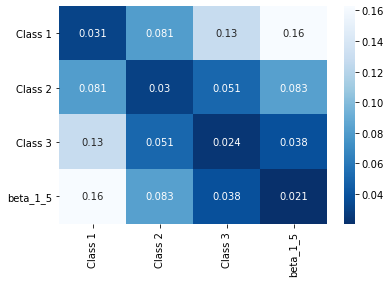

In [37]:
# original distance for bounded samples
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

In [ ]:
test = bounded_samples[0:60]
test.loc[test['label']=='beta_1_2','label'] = 'Class 1'
test.loc[test['label']=='beta_1_3','label'] = 'Class 2'
test.loc[test['label']=='beta_1_4','label'] = 'Class 3'

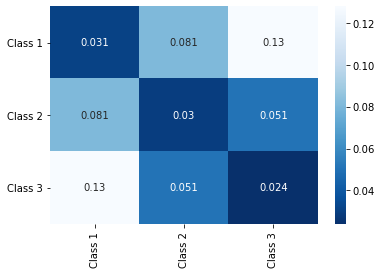

In [39]:
# original distance for bounded samples
original_d, original_std = d.w_distance(test)
d.plot_matrix(original_d, test.iloc[:,-1].unique())

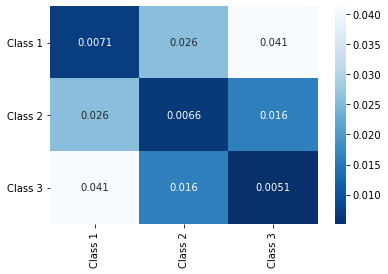

(0.9957536963169222, 1.63599298177924e-08)

In [41]:
nr_moments = 4
moments_df = dem.get_moments(test, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

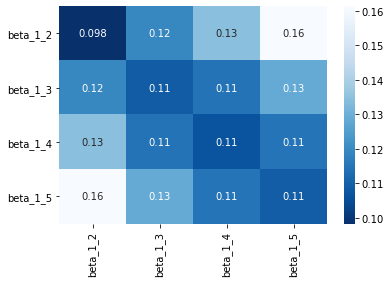

In [9]:
# original distance for standardized bounded samples
original_d, original_std = d.w_distance(bounded_samples_st)
d.plot_matrix(original_d, bounded_samples_st.iloc[:,-1].unique())

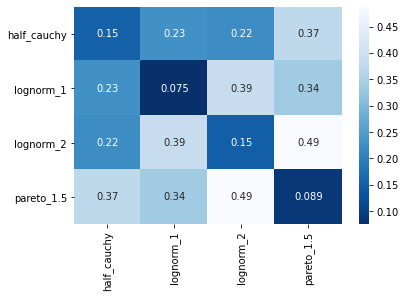

In [7]:
# original distance for heavytail samples
original_d, original_std = d.w_distance(heavytail_samples)
d.plot_matrix(original_d, heavytail_samples.iloc[:,-1].unique())

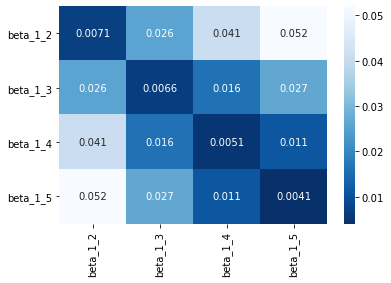

(0.9467497056816001, 2.8263482195264257e-08)

In [10]:
nr_moments = 4
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

# Moments approach

In [146]:
input_size_list = [5, 10, 50, 100, 500, 1000]
nr_features_list = list(range(1,21))

## 1- Bounded

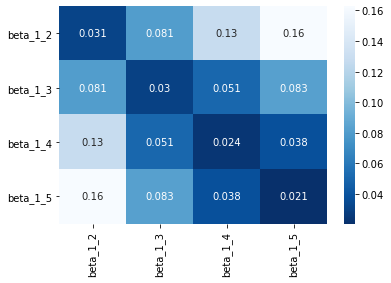

In [144]:
# original distance for bounded samples
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

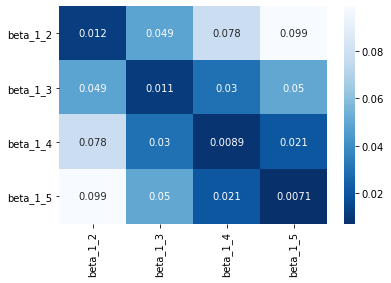

(0.9970457902511078, 5.224644272294204e-17)

In [147]:
nr_moments = 2
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

In [147]:
moments_res = d.cv_samplesize_moments(input_size_list, nr_features_list, bounded_dists, nr_multisets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

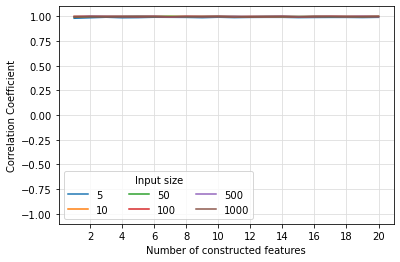

In [148]:
d.plot_cv_moments(moments_res)

## 2 - standardized

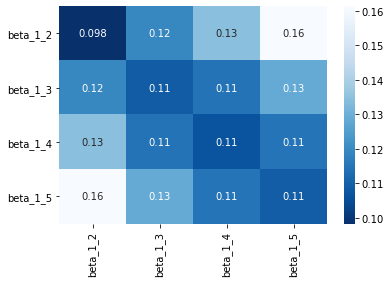

In [160]:
# original distance
original_d, original_std = d.w_distance(bounded_samples_st)
d.plot_matrix(original_d, bounded_samples_st.iloc[:,-1].unique())

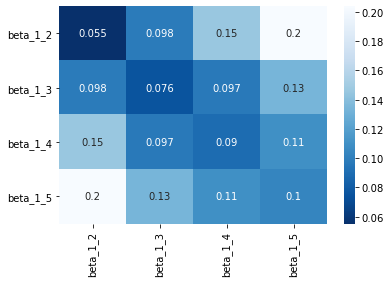

(0.92683154663125, 2.477081902657186e-07)

In [164]:
nr_moments = 3
moments_df = dem.get_moments(bounded_samples_st, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

In [149]:
moments_st_res = d.cv_samplesize_moments(input_size_list, nr_features_list, bounded_dists, nr_multisets, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

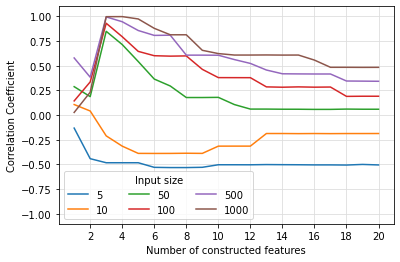

In [150]:
d.plot_cv_moments(moments_st_res)

## 3 - Varying number of elements

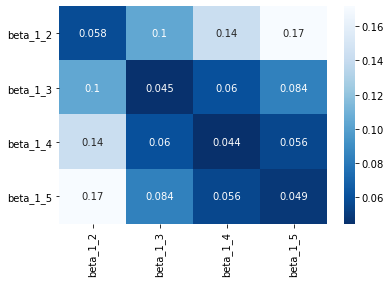

In [177]:
# original distance
original_d, original_std = d.w_distance_flex(bounded_samples_flex)
d.plot_matrix(original_d, bounded_samples_st.iloc[:,-1].unique())

In [15]:
from functools import partial

In [23]:
samples = bounded_samples_flex
nr_moments_list = [2,3]
for j in nr_moments_list:
    partial_moments = partial(dem.get_moments_partial, nr_moments=j)
    moments_res = samples['sample_set'].apply(partial_moments)
    moments_df = pd.DataFrame(moments_res.tolist())
    moments_df['label'] = samples['label']

In [195]:
samples

,sample_set,len,label
0,"[0.5576090001429697, 0.05632681621958549, 0.25...",7,beta_1_2
1,"[0.4398599709076381, 0.843487838250669]",2,beta_1_2
2,"[0.5574139116161135, 0.5695546881570702, 0.397...",6,beta_1_2
3,[0.4025589252732598],1,beta_1_2
4,"[0.28837452917443784, 0.20247537464770668, 0.1...",10,beta_1_2
...,...,...,...
75,"[0.02117551312875857, 0.10897971276966394, 0.0...",6,beta_1_5
76,"[0.17260806291463188, 0.08341087107846604]",2,beta_1_5
77,"[0.08686501321880966, 0.04196546555678865, 0.0...",7,beta_1_5
78,"[0.1295257693923411, 0.07509172707571657, 0.33...",6,beta_1_5


In [203]:
moments_flex_res = d.cv_samplesize_moments(input_size_list, nr_features_list, bounded_dists, nr_multisets, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

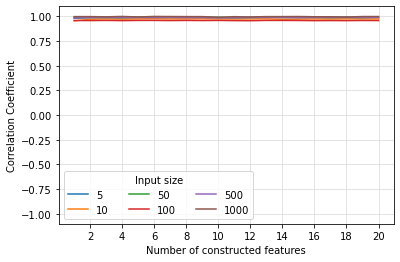

In [204]:
d.plot_cv_moments(moments_flex_res)

## 4 - Multi-modal

In [205]:
nr_mm_dist = 10
nr_modes = 5

In [206]:
moments_mm_res = d.cv_samplesize_moments_mm(input_size_list, nr_features_list, nr_multisets, nr_mm_dist, nr_modes)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

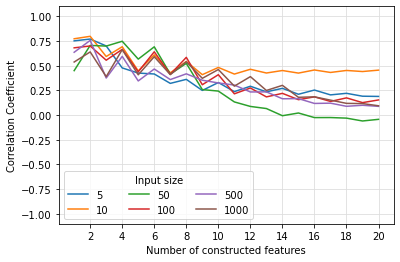

In [207]:
d.plot_cv_moments(moments_mm_res)

## 5 - Heavytail

In [187]:
moments_ht_res = d.cv_samplesize_moments(input_size_list, nr_features_list, heavytail_dists, nr_multisets, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

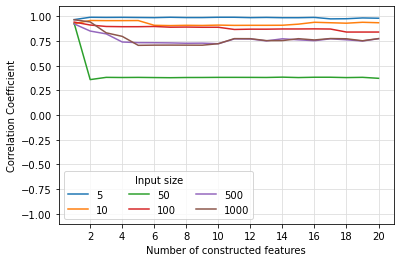

In [188]:
d.plot_cv_moments(moments_ht_res)

In [127]:
moments_res.to_csv('results/moments/corr_distance_bounded.csv')
moments_st_res.to_csv('results/moments/corr_distance_bounded_st.csv')
moments_mm_res.to_csv('results/moments/corr_distance_multimodal.csv')
moments_ht_res.to_csv('results/moments/corr_distance_heavytail.csv')

# KDE

In [8]:
input_size_list = [5, 10, 50, 100, 500, 1000]
nr_features_list = list(np.arange(2,21))

## 1- Bounded

In [136]:
kde_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'kde')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

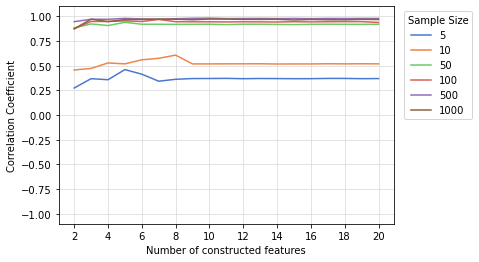

In [137]:
d.plot_cv_numsteps_samplesize(kde_res)

## 2- Standardized

In [138]:
kde_st_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'kde', standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

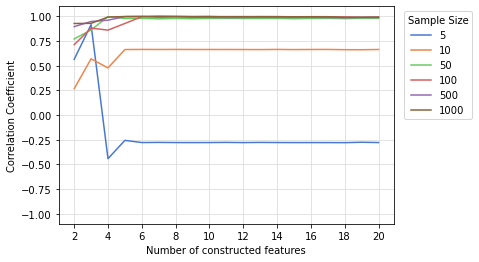

In [141]:
d.plot_cv_numsteps_samplesize(kde_st_res)

## 3- Varing number of elemenst

In [139]:
kde_flex_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'kde', flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

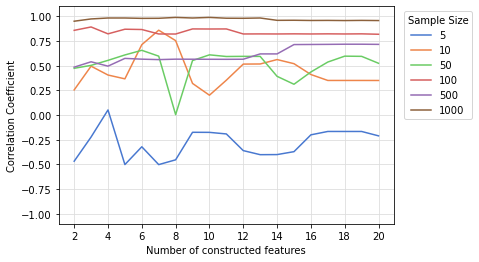

In [140]:
d.plot_cv_numsteps_samplesize(kde_flex_res)

## 4- Heavytail

In [142]:
kde_ht_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, heavytail_dists, nr_multisets, 'kde', transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

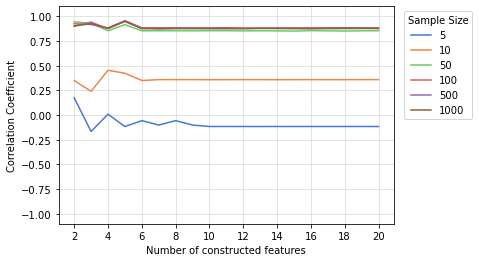

In [143]:
d.plot_cv_numsteps_samplesize(kde_ht_res)

## 5- multimodal

In [144]:
nr_mm_dist = 10
nr_modes = 5
kde_mm_res = d.cv_numsteps_samplesize_mm(input_size_list, nr_features_list, nr_multisets, nr_mm_dist, nr_modes, 'kde')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

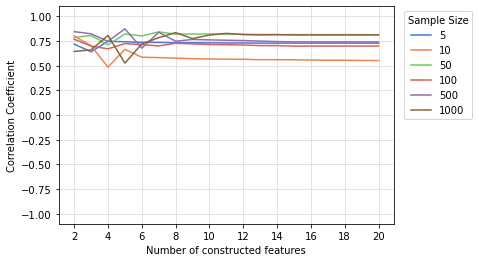

In [145]:
d.plot_cv_numsteps_samplesize(kde_mm_res)

In [133]:
kde_res.to_csv('results/kde/corr_distance_bounded.csv')
kde_st_res.to_csv('results/kde/corr_distance_bounded_st.csv')
kde_ht_res.to_csv('results/kde/corr_distance_heavytail.csv')
kde_mm_res.to_csv('results/kde/corr_distance_multimodal.csv')

# EDF

In [9]:
input_size_list = [5, 10, 50, 100, 500, 1000]
nr_features_list = list(np.arange(2,21))

## 1- Bounded

In [10]:
edf_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'edf')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

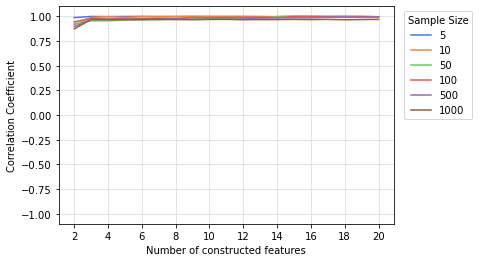

In [11]:
d.plot_cv_numsteps_samplesize(edf_res)

## 2- Standardized

In [12]:
edf_st_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'edf', standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

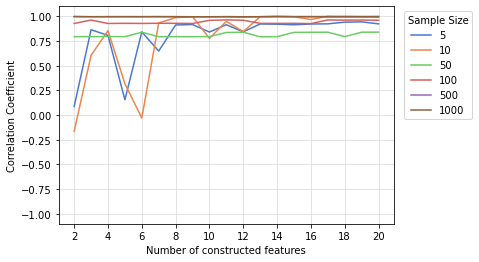

In [13]:
d.plot_cv_numsteps_samplesize(edf_st_res)

## 3- multimodal

In [14]:
nr_mm_dist = 10
nr_modes = 5
edf_mm_res = d.cv_numsteps_samplesize_mm(input_size_list, nr_features_list, nr_multisets, nr_mm_dist, nr_modes, 'edf')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

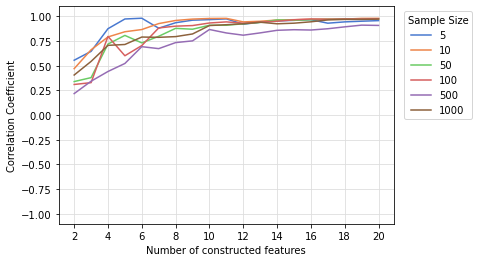

In [15]:
d.plot_cv_numsteps_samplesize(edf_mm_res)

## 4- Heavy tail

In [16]:
edf_ht_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, heavytail_dists, nr_multisets, 'edf', transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

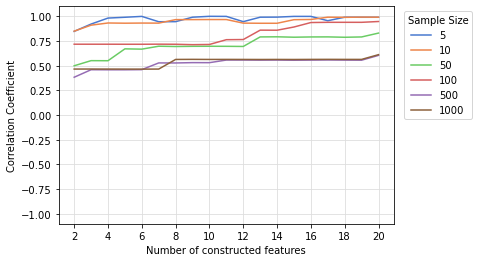

In [17]:
d.plot_cv_numsteps_samplesize(edf_ht_res)

## 5- Varying number of elements

In [21]:
edf_flex_res = d.cv_numsteps_samplesize(input_size_list, nr_features_list, bounded_dists, nr_multisets, 'edf', flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

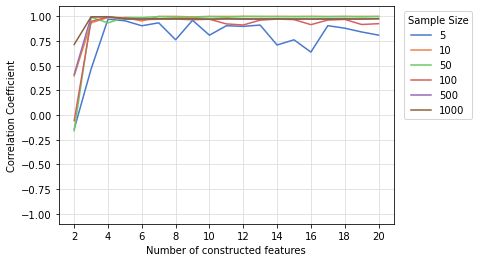

In [22]:
d.plot_cv_numsteps_samplesize(edf_flex_res)

# ECF

In [91]:
input_size_list = [5, 10, 50, 100, 500, 1000]
nr_feature_list = np.arange(2,21)
t = [2*np.pi]
nr_multisets = 20

## 1- Bounded

In [44]:
ecf_res = d.cv_ecf(input_size_list, t, nr_feature_list, bounded_dists, nr_multisets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

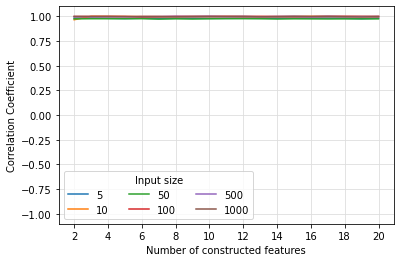

In [45]:
d.plot_cv_ecf(ecf_res)

## 2- standardized

In [49]:
ecf_st_res = d.cv_ecf(input_size_list, t, nr_feature_list, bounded_dists, nr_multisets, standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

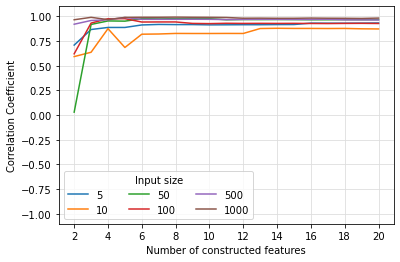

In [50]:
d.plot_cv_ecf(ecf_st_res)

## 3- Varying number of elemnts

In [101]:
ecf_flex_res = d.cv_ecf(input_size_list, t, nr_feature_list, bounded_dists, nr_multisets, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

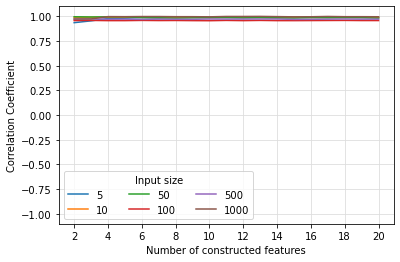

In [102]:
d.plot_cv_ecf(ecf_flex_res)

## 4- Heavy tail

In [51]:
ecf_ht_res = d.cv_ecf(input_size_list, t, nr_feature_list, heavytail_dists, nr_multisets, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

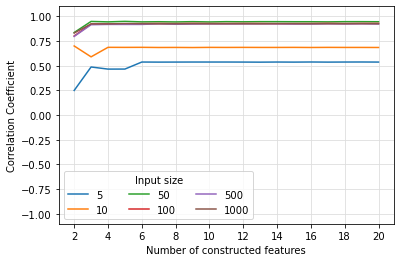

In [52]:
d.plot_cv_ecf(ecf_ht_res)

## 5- Multimodal

In [53]:
nr_mm_dist = 10
nr_modes = 5
ecf_mm_res = d.cv_ecf_mm(input_size_list, t, nr_feature_list, nr_multisets, nr_mm_dist, nr_modes)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

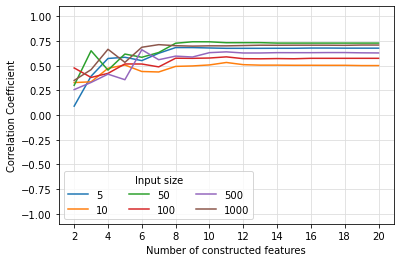

In [54]:
d.plot_cv_ecf(ecf_mm_res)